In [66]:
# Importing Necessary Modules
#--------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Life%20Expectancy%20Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [68]:
df.shape

(2938, 22)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [70]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Country" is
 Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64
-------------------------------------------------
unique values in column "Year" is
 2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64
-------------------------------------------------
unique values in column "Status" is
 Developing    2426
Developed      512
Name: Status, dtype: int64
-------------------------------------------------
unique values in column "Life expectancy " is
 73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
       

In [71]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [72]:
object_col

['Country', 'Status']

In [73]:
num_col

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [74]:
def remove_whitespace(x):
   
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [75]:
df.Country = df.Country.apply(remove_whitespace)

In [76]:
distinct_countries = df['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [77]:
# Categorical Variable 2 :: Status
distinct_status = df['Status'].unique()
distinct_status

array(['Developing', 'Developed'], dtype=object)

In [78]:
#Changing column names
#------------------------
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
df.columns = new_cols
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [79]:
df.adult_mortality = df.apply(lambda x: np.nan if (x.adult_mortality < 35 or x.adult_mortality > 600) else x.adult_mortality, axis=1)
df.infant_deaths = df.apply(lambda x: np.nan if (x.infant_deaths < 2 or x.infant_deaths > 900) else x.infant_deaths, axis=1)
df.under_five_deaths = df.apply(lambda x: np.nan if (x.under_five_deaths < 3 or x.under_five_deaths > 800) else x.under_five_deaths, axis=1)

In [80]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,country,0
1,year,0
2,status,0
3,life_expectancy,10
4,adult_mortality,468
5,infant_deaths,1206
6,alcohol,194
7,percentage_expenditure,0
8,hepatitis_b,553
9,measles,0


In [81]:
df.fillna(df.mean(), inplace=True)

In [82]:
# Features not required will be stored in this list
feature_not_required = []

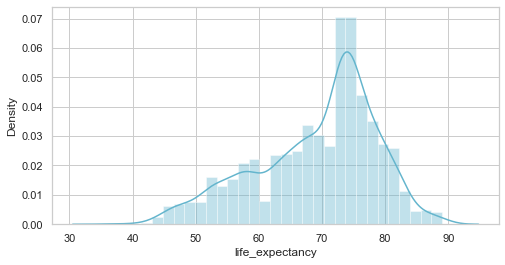

In [83]:
# Before proceeding with feature elimination lets have a look at the distribution of our 'Y'
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(df['life_expectancy'], kde = True, color = 'c')

In [84]:
feature_not_required.append('infant_deaths')
feature_not_required.append('alcohol')

<AxesSubplot:xlabel='income_composition_of_resources', ylabel='life_expectancy'>

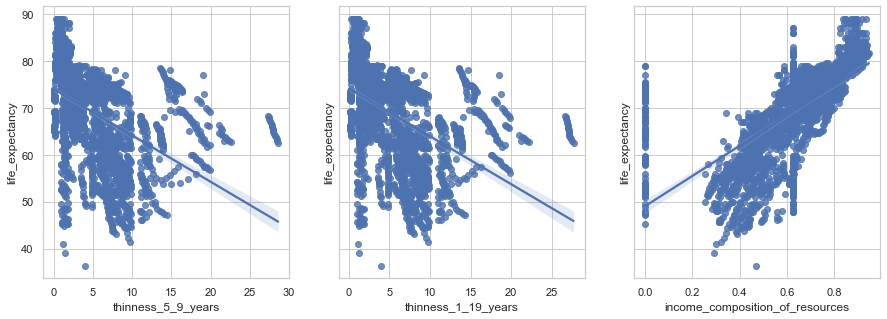

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['thinness_1_19_years'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['thinness_5_9_years'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['income_composition_of_resources'], y=df['life_expectancy'], ax=ax3)

In [86]:
feature_not_required.append('thinness_1_19_years')
feature_not_required.append('thinness_5_9_years')

<AxesSubplot:xlabel='bmi', ylabel='life_expectancy'>

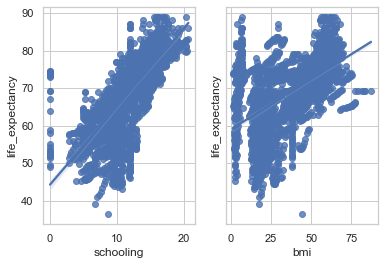

In [87]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=df['schooling'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['bmi'], y=df['life_expectancy'], ax=ax2)

In [88]:
feature_not_required.append('bmi')

In [89]:
df_a = df.drop(feature_not_required,axis=1)

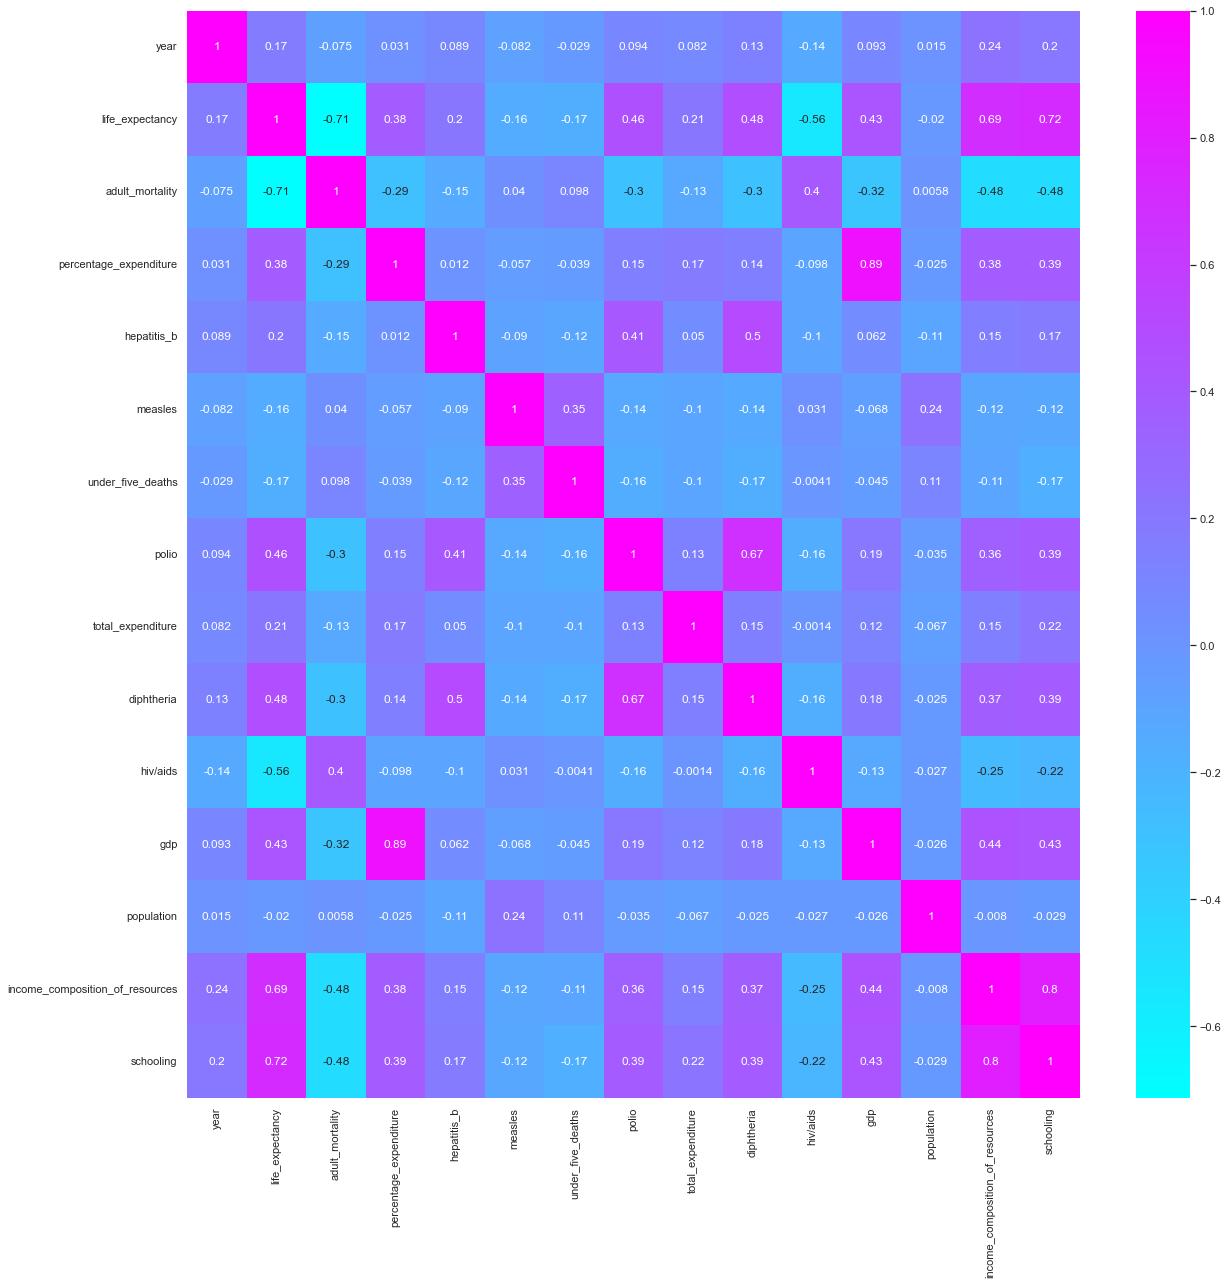

In [90]:
#Now lets find correlation
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(df_a.corr(), annot=True, cmap='cool')

In [91]:
# Since Infant deaths have been removed as a feature, lets remove under_5_death as well since most of it represents the 
# infant deaths only.
df_a.drop(['under_five_deaths'],axis=1)

,country,year,status,life_expectancy,adult_mortality,percentage_expenditure,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.000000,71.279624,65.0,1154,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.000000,73.523582,62.0,492,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.000000,73.219243,64.0,430,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.000000,78.184215,67.0,2787,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.000000,7.097109,68.0,3013,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,186.581377,0.000000,68.0,31,67.0,7.13,65.0,33.6,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,186.581377,0.000000,7.0,998,7.0,6.52,68.0,36.7,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.000000,0.000000,73.0,304,73.0,6.53,71.0,39.8,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,186.581377,0.000000,76.0,529,76.0,6.16,75.0,42.1,548.587312,12366165.0,0.427,9.8


In [92]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [93]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [94]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in [ 'year',  'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

year : 1992.0 , 2024.0
life_expectancy : 44.600000000000016 , 94.19999999999999
adult_mortality : -32.5 , 379.5
infant_deaths : -32.8729792147806 , 81.45496535796767
alcohol : -8.35375 , 16.83625
percentage_expenditure : -650.587860061875 , 1096.807346997125
hepatitis_b : 58.35115303983228 , 118.58930817610063
measles : -540.375 , 900.625
bmi : -35.650000000000006 , 111.15
under_five_deaths : -32.99625234228607 , 102.99375390381012
polio : 49.5 , 125.5
total_expenditure : -0.0699999999999994 , 11.77
diphtheria : 49.5 , 125.5
hiv/aids : -0.9500000000000001 , 1.85
gdp : -9773.520214957722 , 17837.165679596204
population : -18082769.555078745 , 31255061.925131243
thinness_1_19_years : -6.65 , 15.35
thinness_5_9_years : -6.799999999999999 , 15.599999999999998
income_composition_of_resources : 0.10262499999999991 , 1.1736250000000001
schooling : 4.600000000000002 , 19.799999999999997


In [95]:
lower_boundries

[1992.0,
 44.600000000000016,
 -32.5,
 -32.8729792147806,
 -8.35375,
 -650.587860061875,
 58.35115303983228,
 -540.375,
 -35.650000000000006,
 -32.99625234228607,
 49.5,
 -0.0699999999999994,
 49.5,
 -0.9500000000000001,
 -9773.520214957722,
 -18082769.555078745,
 -6.65,
 -6.799999999999999,
 0.10262499999999991,
 4.600000000000002]

In [96]:
upper_boundries

[2024.0,
 94.19999999999999,
 379.5,
 81.45496535796767,
 16.83625,
 1096.807346997125,
 118.58930817610063,
 900.625,
 111.15,
 102.99375390381012,
 125.5,
 11.77,
 125.5,
 1.85,
 17837.165679596204,
 31255061.925131243,
 15.35,
 15.599999999999998,
 1.1736250000000001,
 19.799999999999997]

In [97]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in [ 'year',  'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [98]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [99]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                                 Total Null Values  Percentage
country                                          0         0.0
thinness_5_9_years                               0         0.0
thinness_1_19_years                              0         0.0
population                                       0         0.0
gdp                                              0         0.0
hiv/aids                                         0         0.0
diphtheria                                       0         0.0
total_expenditure                                0         0.0
polio                                            0         0.0
under_five_deaths                                0         0.0
bmi                                              0         0.0
measles                                          0         0.0
hepatitis_b                                      0         0.0
percentage_expenditure                           0         0.0
alcohol                                          0     

In [100]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = [ 'year','life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))                                                                                                                  

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Albania,2015,Developing,77.8,74.000000,38.581986,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,77.5,186.581377,38.581986,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,77.2,84.000000,38.581986,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,76.9,86.000000,38.581986,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,76.6,88.000000,38.581986,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3



Inference:
Before removal of outliers, The dataset had 2938 samples.
After removal of outliers, The dataset now has 1374 samples.


In [101]:
df.shape

(2938, 22)

In [102]:
#Removal of outlier:

df2 = df1.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = [ 'year','life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df2[df2[i] <= (Q3+(2.5*IQR))]
    df2 = df2[df2[i] >= (Q1-(2.5*IQR))]
    df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df2.shape[0]))                                                                                                                  

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Albania,2015,Developing,77.8,74.000000,38.581986,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,77.5,186.581377,38.581986,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,77.2,84.000000,38.581986,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,76.9,86.000000,38.581986,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,76.6,88.000000,38.581986,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3



Inference:
Before removal of outliers, The dataset had 1374 samples.
After removal of outliers, The dataset now has 880 samples.


In [103]:
df2.shape

(880, 22)

In [104]:
df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Albania,2015,Developing,77.8,74.000000,38.581986,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,77.5,186.581377,38.581986,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,77.2,84.000000,38.581986,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,76.9,86.000000,38.581986,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,76.6,88.000000,38.581986,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [105]:
# Splittinng X and Y (Features and output)
#-----------------------------------
y=df2['life_expectancy']
x=df2.drop('life_expectancy',axis=1)

In [106]:
# Encoding Categorical Variables
#-------------------------------
Country_dummy=pd.get_dummies(x['country'])
status_dummy=pd.get_dummies(x['status'])
x.drop(['country','status'],inplace=True,axis=1)
x=pd.concat([x,Country_dummy,status_dummy],axis=1)

In [107]:
x.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,Turkey,Turkmenistan,UnitedArabEmirates,UnitedKingdomofGreatBritainandNorthernIreland,UnitedStatesofAmerica,Uruguay,Uzbekistan,Venezuela(BolivarianRepublicof),Developed,Developing
0,2015,74.000000,38.581986,4.60,364.975229,99.0,0,58.0,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,186.581377,38.581986,4.51,428.749067,98.0,0,57.2,51.997502,98.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,84.000000,38.581986,4.76,430.876979,99.0,0,56.5,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,86.000000,38.581986,5.14,412.443356,99.0,9,55.8,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,88.000000,38.581986,5.37,437.062100,99.0,28,55.1,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

Linear_model.fit(xtrain,ytrain)
Linear_model.score(xtrain,ytrain)*100

91.96233684878824

In [109]:
import pandas as pd
#import pingouin as pg
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib
from matplotlib import style
import matplotlib.font_manager
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
#import squarify
import warnings
import os
# import opendatasets as od
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')
style.use('ggplot')

# plotly settings
pio.renderers = 'kaggle'

# set warning settings
warnings.filterwarnings(action='ignore')

# change default params in matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.family'] = "roboto"
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [111]:
x.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,Turkey,Turkmenistan,UnitedArabEmirates,UnitedKingdomofGreatBritainandNorthernIreland,UnitedStatesofAmerica,Uruguay,Uzbekistan,Venezuela(BolivarianRepublicof),Developed,Developing
0,2015,74.000000,38.581986,4.60,364.975229,99.0,0,58.0,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,186.581377,38.581986,4.51,428.749067,98.0,0,57.2,51.997502,98.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,84.000000,38.581986,4.76,430.876979,99.0,0,56.5,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,86.000000,38.581986,5.14,412.443356,99.0,9,55.8,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,88.000000,38.581986,5.37,437.062100,99.0,28,55.1,51.997502,99.0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Albania,2015,Developing,77.8,74.000000,38.581986,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,77.5,186.581377,38.581986,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,77.2,84.000000,38.581986,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,76.9,86.000000,38.581986,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,76.6,88.000000,38.581986,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [113]:
df2['status'].value_counts()

Developing    565
Developed     315
Name: status, dtype: int64

In [114]:
dummies=pd.get_dummies(df2['status'])

In [115]:
dummies

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
875,0,1
876,0,1
877,0,1
878,0,1


In [117]:
df2=pd.concat([dummies,df2],axis='columns')

In [118]:
df2.head()

,Developed,Developing,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,1,Albania,2015,Developing,77.8,74.000000,38.581986,4.60,364.975229,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,0,1,Albania,2014,Developing,77.5,186.581377,38.581986,4.51,428.749067,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,0,1,Albania,2013,Developing,77.2,84.000000,38.581986,4.76,430.876979,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,0,1,Albania,2012,Developing,76.9,86.000000,38.581986,5.14,412.443356,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,0,1,Albania,2011,Developing,76.6,88.000000,38.581986,5.37,437.062100,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [119]:
df2=df2.drop(['status'],axis='columns')

In [121]:
df2.head()

,Developed,Developing,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,1,Albania,2015,77.8,74.000000,38.581986,4.60,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,0,1,Albania,2014,77.5,186.581377,38.581986,4.51,428.749067,98.0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,0,1,Albania,2013,77.2,84.000000,38.581986,4.76,430.876979,99.0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,0,1,Albania,2012,76.9,86.000000,38.581986,5.14,412.443356,99.0,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,0,1,Albania,2011,76.6,88.000000,38.581986,5.37,437.062100,99.0,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [123]:
df2.columns

Index(['Developed', 'Developing', 'country', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [126]:
a = df2[['Developed', 'Developing', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling']]
b = df2['country']

In [128]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=.25,random_state=40)

In [130]:
atrain.shape

(660, 22)

In [131]:
btrain.shape

(660,)

In [136]:
lo=LogisticRegression()
lo.fit(atrain,btrain)

LogisticRegression()

In [138]:
lo.score(atest,btest)*100

0.01818181818181818

In [139]:
tre=DecisionTreeClassifier()
tre.fit(atrain,btrain)

DecisionTreeClassifier()

In [141]:
tre.score(atest,btest)*100

80.0

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rnd= RandomForestClassifier()
rnd.fit(atrain,btrain)

RandomForestClassifier()

In [144]:
rnd.score(atest,btest)

0.9454545454545454

In [147]:
df2.head()

,Developed,Developing,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,1,Albania,2015,77.8,74.000000,38.581986,4.60,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,0,1,Albania,2014,77.5,186.581377,38.581986,4.51,428.749067,98.0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,0,1,Albania,2013,77.2,84.000000,38.581986,4.76,430.876979,99.0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,0,1,Albania,2012,76.9,86.000000,38.581986,5.14,412.443356,99.0,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,0,1,Albania,2011,76.6,88.000000,38.581986,5.37,437.062100,99.0,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [149]:
df2.dtypes

Developed                            uint8
Developing                           uint8
country                             object
year                                 int64
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                      float64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under_five_deaths                  float64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_1_19_years                float64
thinness_5_9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: obje

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


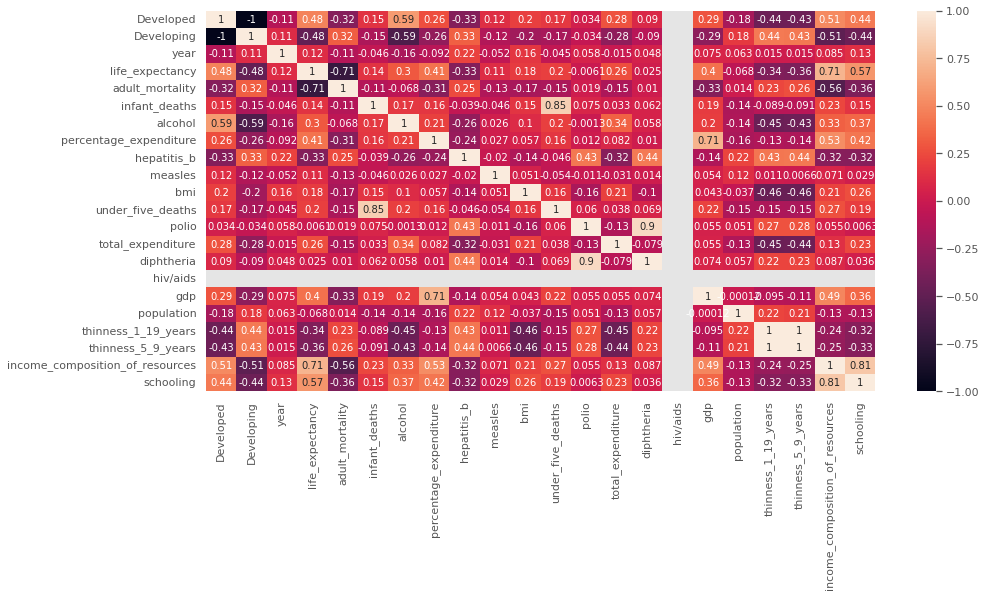

In [151]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), annot=True)

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


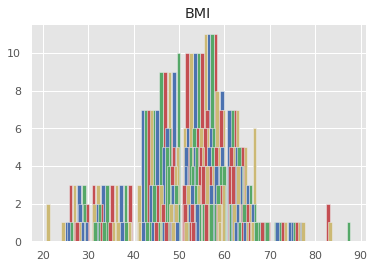

In [157]:
plt.bar(df2['bmi'].unique(), df2["bmi"].value_counts(), color = ['r', 'g','b','y'])
plt.title("BMI")
plt.grid(True)

In [158]:
import sweetviz as sv

In [164]:
data=sv.analyze(df2)

                                             |                                             | [  0%]   00:00 ->…

In [165]:
from IPython.display import IFrame

In [167]:
IFrame(src='Analyze.html',width=1000,height=600)

In [169]:

import plotly.express as px
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [178]:
import dtale
dtale.show(df2)

Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2577, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 177, in build
    parent.data[parent.selected_col]
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = np.histogram(series, **hist_kwargs)
 

2022-03-27 16:35:46,717 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2577, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 177, in build
    parent.data[parent.selected_col]
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = 

Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2577, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 177, in build
    parent.data[parent.selected_col]
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = np.histogram(series, **hist_kwargs)
 

2022-03-27 16:35:47,378 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2577, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 137, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 177, in build
    parent.data[parent.selected_col]
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\column_analysis.py", line 157, in build_histogram_data
    hist_data, hist_labels = 

In [179]:
df2.head()

,Developed,Developing,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,1,Albania,2015,77.8,74.000000,38.581986,4.60,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,0,1,Albania,2014,77.5,186.581377,38.581986,4.51,428.749067,98.0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,0,1,Albania,2013,77.2,84.000000,38.581986,4.76,430.876979,99.0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,0,1,Albania,2012,76.9,86.000000,38.581986,5.14,412.443356,99.0,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,0,1,Albania,2011,76.6,88.000000,38.581986,5.37,437.062100,99.0,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


2022-03-27 19:06:15,601 - ERROR    - Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


2022-03-27 19:06:18,051 - ERROR    - Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


Executing shutdown due to inactivity...


2022-03-27 20:11:47,450 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-27 20:11:51,577 - INFO     - Executing shutdown...


In [183]:
df2.columns

Index(['Developed', 'Developing', 'country', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

<AxesSubplot:>

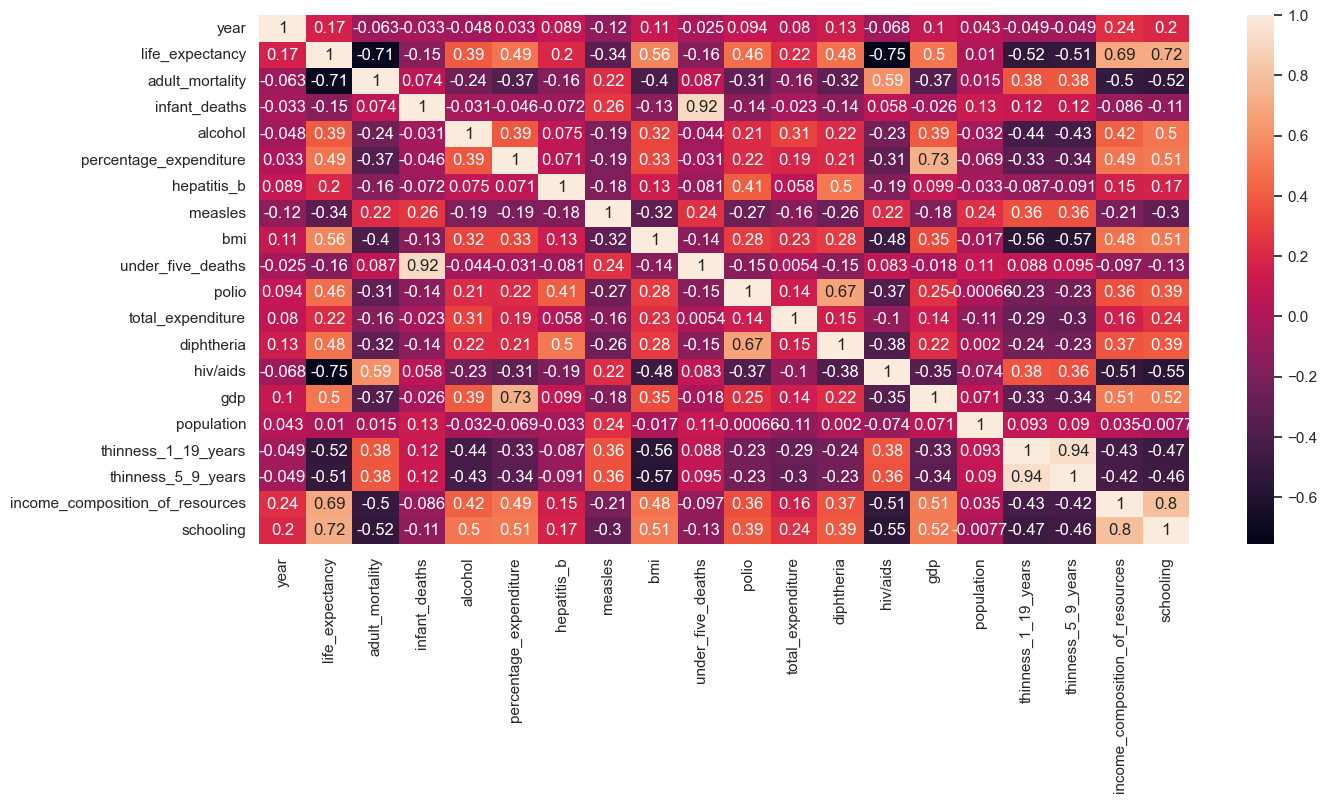

In [187]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

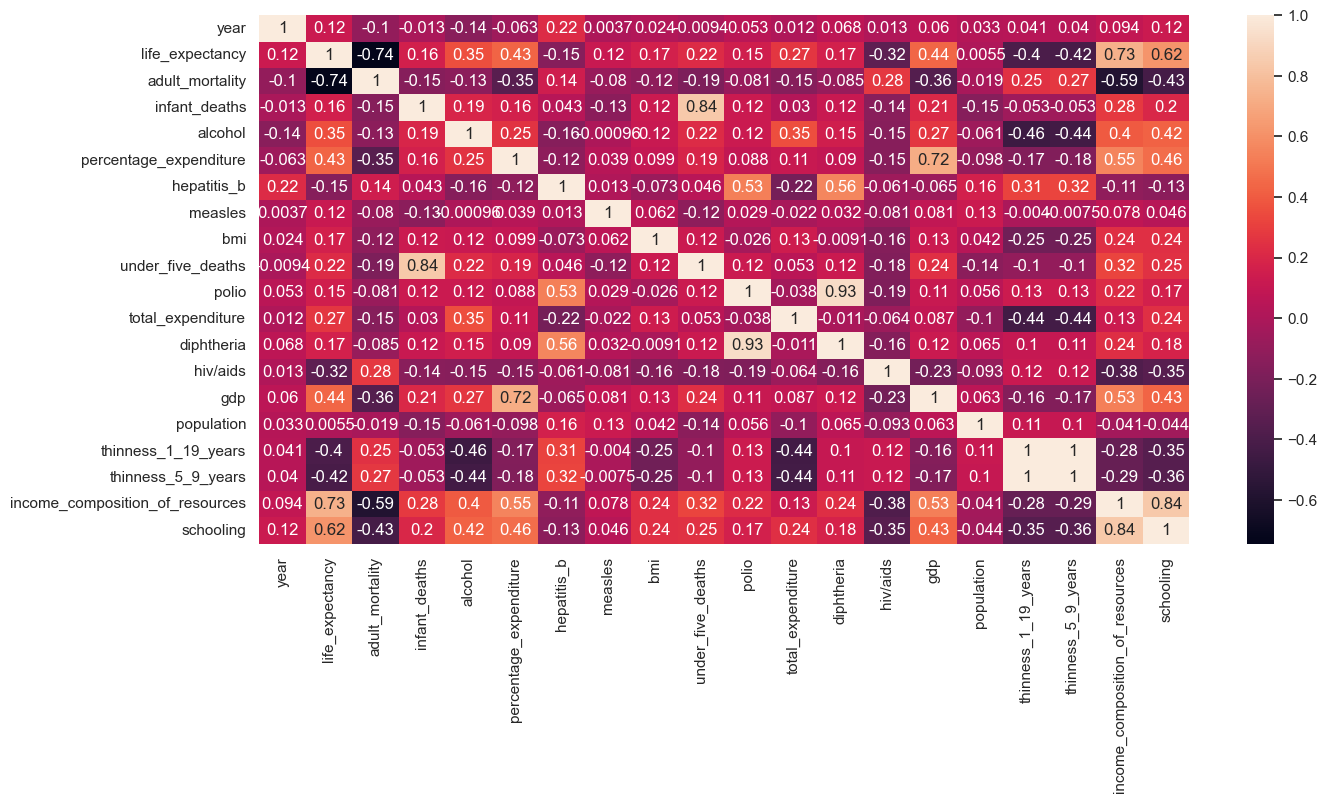

In [188]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:>

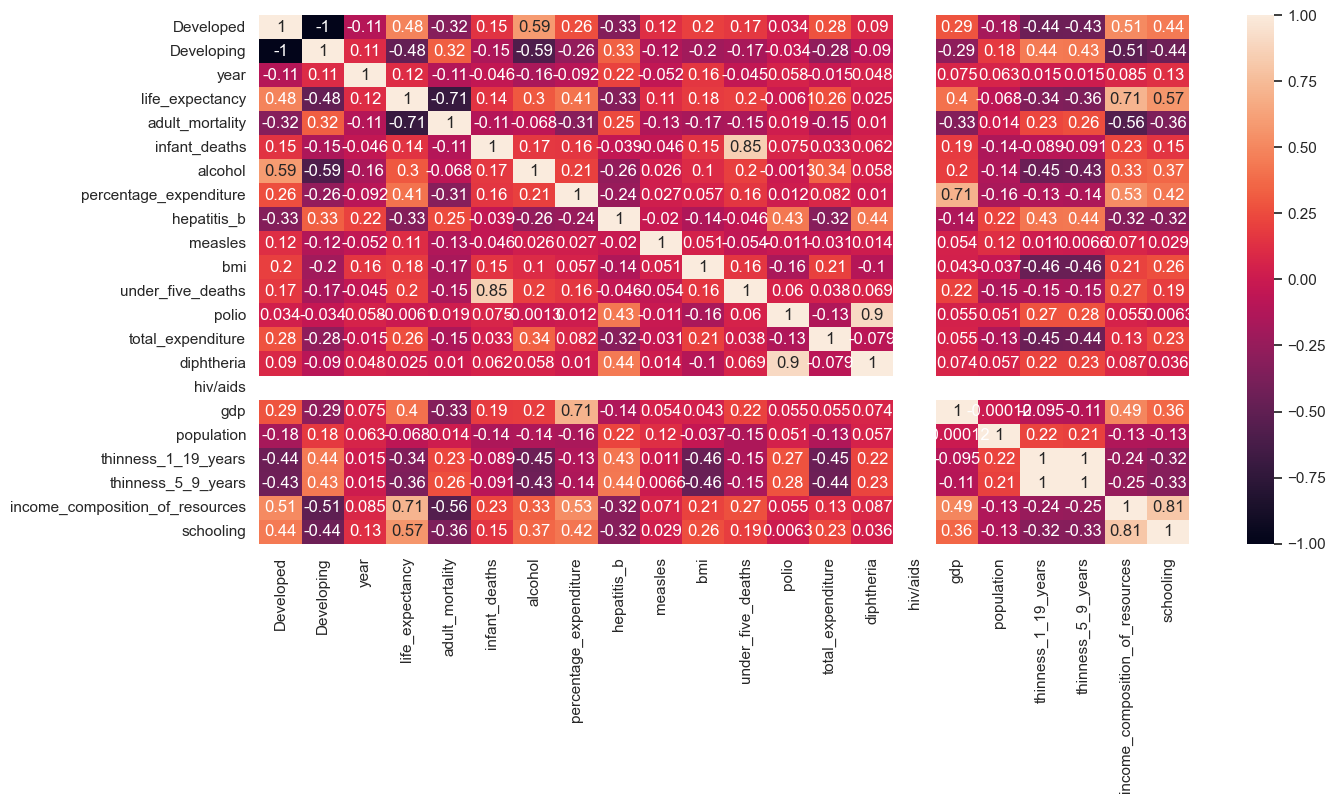

In [189]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), annot=True)